In [0]:
import os
import pandas as pd
from google.colab import drive

In [3]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [4]:
cd "/content/Drive/My Drive/Spring 2019/ML/sample for project"

/content/Drive/My Drive/Spring 2019/ML/sample for project


The below line can be skipped as I downloaded

In [0]:
!git clone https://github.com/tensorflow/models.git
!apt-get -qq install libprotobuf-java protobuf-compiler
!protoc ./models/research/object_detection/protos/string_int_label_map.proto --python_out=.
!cp -R models/research/object_detection/ object_detection/
!rm -rf models

Cloning into 'models'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 25627 (delta 18), reused 17 (delta 9), pack-reused 25600
Receiving objects: 100% (25627/25627), 508.00 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (15375/15375), done.
Checking out files: 100% (2883/2883), done.


In [0]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
cd "/content/Drive/My Drive/Spring 2019/ML/sample for project"

/content/Drive/My Drive/Spring 2019/ML/sample for project


In [5]:
ls

clickbait17-train-170331/
clickbait17-train-170331.zip
clickbait17-train-170630/
clickbait17-train-170630.zip
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08/
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08.tar.gz
object_detection/
papers/
src/


In [0]:
cd /content

/content


In [0]:
ls

Drive/  object_detection/  sample_data/


In [0]:
cd sample_data

/content/sample_data


In [0]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
df = pd.read_json('./clickbait17-train-170331/instances.jsonl', lines= True, orient = 'columns')

In [0]:
#true dataset
df2 = pd.read_json('./clickbait17-train-170331/truth.jsonl', lines= True, orient = 'columns')

In [0]:
df2.head()

,id,truthClass,truthJudgments,truthMean,truthMedian,truthMode
0,608310377143799808,no-clickbait,"[0.0, 0.6666667, 0.0, 0.33333334000000003, 0.0]",0.200000,0.000000,0.000000
1,609297109095972864,no-clickbait,"[0.6666667, 0.0, 0.0, 0.0, 0.0]",0.133333,0.000000,0.000000
2,609504474621612032,clickbait,"[0.33333334000000003, 0.6666667, 1.0, 0.0, 0.6...",0.533333,0.666667,0.666667
3,609748367049105408,no-clickbait,"[1.0, 0.0, 0.33333334000000003, 0.333333340000...",0.466667,0.333333,0.333333
4,608688782821453824,clickbait,"[1.0, 0.33333334000000003, 0.6666667, 0.333333...",0.666667,0.666667,1.000000


In [0]:
df = df.join(df2.set_index('id'), on='id')

In [0]:
list(df.columns)

['id',
 'postMedia',
 'postText',
 'postTimestamp',
 'targetCaptions',
 'targetDescription',
 'targetKeywords',
 'targetParagraphs',
 'targetTitle',
 'truthClass',
 'truthJudgments',
 'truthMean',
 'truthMedian',
 'truthMode']

In [0]:
df.loc[df['truthClass'] == 'clickbait']

,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle,truthClass,truthJudgments,truthMean,truthMedian,truthMode
2,609504474621612032,[],[U.S. Soccer should start answering tough ques...,Fri Jun 12 23:36:05 +0000 2015,[US to vote for Ali in FIFA election and not B...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",U.S. Soccer should start answering tough quest...,clickbait,"[0.33333334000000003, 0.6666667, 1.0, 0.0, 0.6...",0.533333,0.666667,0.666667
4,608688782821453824,[media/608688782821453825.jpg],[Could light bulbs hurt your health? One compa...,Wed Jun 10 17:34:49 +0000 2015,[Electric lights have made the world safer and...,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,Warning labels on your light bulbs,clickbait,"[1.0, 0.33333334000000003, 0.6666667, 0.333333...",0.666667,0.666667,1.000000
5,609551038983475200,[media/609551038983475201.png],[13 classic ’00s songs that were actually mean...,Sat Jun 13 02:41:07 +0000 2015,[],,,[One artist’s trash is another’s No. 1 single....,13 Classic ’00s Songs That Were Actually Meant...,clickbait,"[0.33333334000000003, 0.6666667, 1.0, 0.666666...",0.733333,0.666667,1.000000
14,608926452596273152,[media/608926452596273152.jpg],[Tourists detained in Malaysia for getting nak...,Thu Jun 11 09:19:14 +0000 2015,[Four tourists have been detained after stripp...,More tourists are in trouble for getting naked...,"travel, destinations, uncategorized, us-world,...",[More tourists are in trouble for getting nake...,Tourists detained in Malaysia for getting nake...,clickbait,"[1.0, 0.6666667, 1.0, 0.0, 1.0]",0.733333,1.000000,1.000000
20,609631563597389824,[],[The brutal dictatorship the world keeps ignor...,Sat Jun 13 08:01:05 +0000 2015,[Eritrean President Isaias Afwerki listens as ...,"Why don't U.N. accusations of ""crimes against ...","Eritrea, Africa, North Korea, United Nations, ...","[On Monday, the United Nations released the re...",The brutal dictatorship the world keeps ignoring,clickbait,"[1.0, 0.6666667, 1.0, 0.6666667, 1.0]",0.866667,1.000000,1.000000
21,609372816568360960,[media/609372816568360960.jpg],[RT @BBCWalesNews: Caerphilly farmer may get p...,Fri Jun 12 14:52:55 +0000 2015,[The High Court at the Royal Courts of Justice],A Caerphilly farm owner forced to sell land to...,,"[Share this with, Email, Facebook, Messenger, ...",Caerphilly farmer may get full payout after 24...,clickbait,"[0.0, 0.6666667, 0.6666667, 0.6666667, 0.0]",0.400000,0.666667,0.666667
24,608658774769958912,[media/608658774769958912.jpg],[Man dies when car plunges from parking garage],Wed Jun 10 15:35:34 +0000 2015,[],The driver of a pickup was killed when he cras...,,[The driver of a pickup truck died when he cra...,Man Dies When Car Plunges from New Orleans Par...,clickbait,"[1.0, 0.6666667, 0.6666667, 0.0, 1.0]",0.666667,0.666667,1.000000
25,609396415681445888,[media/609396415681445888.png],[5 inconsistencies in 'Jurassic World' that wi...,Fri Jun 12 16:26:42 +0000 2015,[],VIDEO: Science fiction without the science.,,"[""Jurassic World,"" the latest installment of t...","""Jurassic World"" uses bad science - Business I...",clickbait,"[0.6666667, 1.0, 0.6666667, 0.6666667, 0.33333...",0.666667,0.666667,0.666667
30,608347082844438528,[media/608347082844438530.jpg],[RT @BBCOS: The secret history of women's foot...,Tue Jun 09 18:57:01 +0000 2015,"[Newsbeat, Newsbeat, Members of the Amazons fo...","Exclusive music news, big interviews, entertai...",,"[By Anna Doble Newsbeat online editor, From th...",The secret history of women's football,clickbait,"[0.6666667, 1.0, 0.6666667, 0.6666667, 0.6666667]",0.733333,0.666667,0.666667
35,609535458863882240,[],[How do dogs donate blood?],Sat Jun 13 01:39:12 +0000 2015,[Dog giving blood],National Blood Week has been promoting human d...,,"[Share this wit

In [0]:
df['postText'].loc[df['id'] == 608926452596273152]

14    [Tourists detained in Malaysia for getting nak...
Name: postText, dtype: object

In [0]:
df.loc[14]['postText']

['Tourists detained in Malaysia for getting naked on sacred mountain:']

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
df.loc[df['truthClass'] == 'clickbait']['postText']

2       [U.S. Soccer should start answering tough ques...
4       [Could light bulbs hurt your health? One compa...
5       [13 classic ’00s songs that were actually mean...
14      [Tourists detained in Malaysia for getting nak...
20      [The brutal dictatorship the world keeps ignor...
21      [RT @BBCWalesNews: Caerphilly farmer may get p...
24        [Man dies when car plunges from parking garage]
25      [5 inconsistencies in 'Jurassic World' that wi...
30      [RT @BBCOS: The secret history of women's foot...
35                            [How do dogs donate blood?]
37      [These global warming skeptics have their own ...
39      [Nobel-winning sexism in the lab via @RoomForD...
41      [5 incredible Italian dishes you haven't tried...
43      [RT @IndyFootball: PLAYER RATINGS: Jack Wilshe...
46      [The strongest female characters in #JurassicW...
47      [Map: Is Islamic State in a neighborhood near ...
51      [Academic group censures University of Illinoi...
64      [What 

In [0]:
# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('object_detection/data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())
    
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
df.tail()

,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle
2454,609056814819323904,[],[Man who received world's first penis transpla...,Thu Jun 11 17:57:15 +0000 2015,[Six months after undergoing the world's first...,"Surgeons at Stellenbosch University, who carri...","World,s,penis,transplant,patient,set,FATHER,an...",[The man who underwent the world's first succe...,World's first penis transplant patient is set ...
2455,610125815116865536,[media/610125815116865536.jpg],"[RT @NYTSports: Abby didn't start, team couldn...",Sun Jun 14 16:45:04 +0000 2015,"[The New York Times, Basic, All Access, Home D...",With Abby Wambach not starting for the first t...,"Soccer,Wambach Abby,Press Christen,United St...","[WINNIPEG, Manitoba, The moment Abby Wambach s...","At Women’s World Cup, Tie Leaves U.S. on Solid..."
2456,608338587495628800,[media/608338587495628801.jpg],[Obama defends Affordable Care Act ahead of Su...,Tue Jun 09 18:23:16 +0000 2015,[],President Obama talks at the G7 summit in Germ...,,[With the Supreme Court set to issue a ruling ...,Obama Defends Health Law Ahead of Supreme Cour...
2457,609684420082180096,[],[New study of the Deflategate report concludes...,Sat Jun 13 11:31:07 +0000 2015,"[The New York Times, Basic, All Access, Home D...",A new study weakens the case against the Patri...,"Football,Cheating,American Enterprise Institut...","[BEFORE “Deflategate,” the National Football L...",Deflating ‘Deflategate’
2458,608392385425338368,[media/608392385425338368.jpg],[Netflix secures rights to Brad Pitt Afghanist...,Tue Jun 09 21:57:02 +0000 2015,[],"In a coup for Netflix, the star will star as f...",,[EXCLUSIVE: has acquired distribution rights t...,Brad Pitt to Star in Netflix Film About Afghan...


In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [33]:
TEST_IMAGE_PATHS

['object_detection/test_images/image1.jpg',
 'object_detection/test_images/image2.jpg']

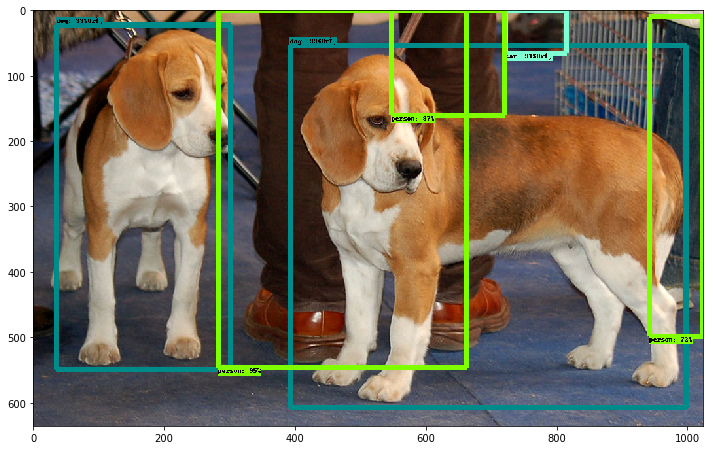

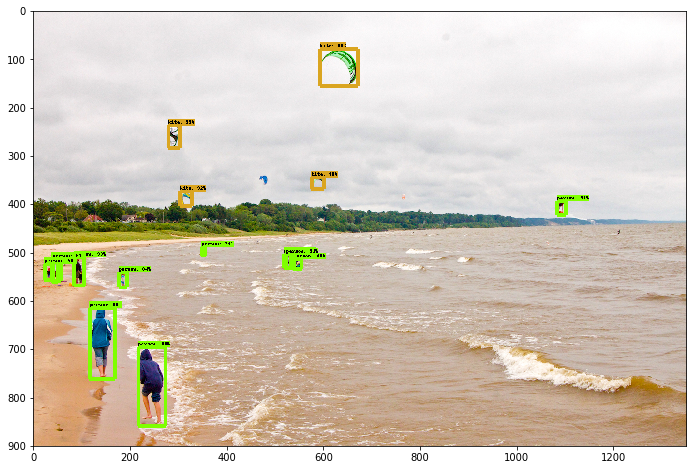

In [11]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

In [10]:
ls

clickbait17-train-170331/
clickbait17-train-170331.zip
clickbait17-train-170630/
clickbait17-train-170630.zip
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08/
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08.tar.gz
object_detection/
papers/
src/


In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'clickbait17-train-170331/media'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '608744463796609024.png') ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [22]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=6)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

ValueError: ignored

In [0]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [0]:
classes

array([[ 1., 76., 62., 15.,  1., 15., 15., 15., 16., 20.,  1.,  1., 88.,
        63., 76., 15., 16., 62., 19., 62., 21., 62., 73., 65., 15., 15.,
        76., 19., 22., 85., 15., 32., 62., 22., 42., 62., 65., 31., 17.,
         4., 17., 63., 62., 70., 90., 18.,  1., 28., 67., 15., 75., 15.,
        67., 67., 20., 62., 35., 72., 25.,  3., 36., 88., 41., 24.,  3.,
        76.,  1., 43., 62.,  1., 82., 27., 15., 39., 19., 38., 90., 62.,
        43., 62., 43., 62., 75., 31., 42., 39., 18., 20., 63., 21., 67.,
        79., 20., 47.,  2., 62.,  9., 27., 38., 72.]], dtype=float32)

In [20]:
type(category_index)

dict

In [21]:
classes[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., 27., 27., 27., 27., 33.,  1.,
       27., 27., 27., 34.,  1., 27., 27., 31., 27., 27., 43., 33.,  1.,
       31., 40., 31., 16., 62., 27.,  1., 41., 31., 34., 27.,  1., 18.,
        1.,  1., 43., 31., 27., 40., 31., 31.,  1.,  1., 31., 27., 27.,
        1., 40., 27., 34., 37., 41., 16., 31., 43., 17., 40., 62., 62.,
       31., 33., 27.,  1., 31., 16., 43., 40.,  1., 31., 27., 19.,  1.,
        1., 18.,  1., 31., 62.,  1.,  1., 33., 43.,  1., 27., 36., 31.,
        1., 33., 31., 41., 31., 39., 33.,  1.,  1.], dtype=float32)

In [24]:
len(classes[0])

100

In [27]:
scores[0]

array([0.9994746 , 0.9988763 , 0.9970072 , 0.9961641 , 0.995666  ,
       0.9907156 , 0.97307384, 0.9377929 , 0.76558554, 0.7507308 ,
       0.69406563, 0.24155335, 0.14602679, 0.14370786, 0.11784966,
       0.09210926, 0.08733546, 0.07051001, 0.06396438, 0.06282651,
       0.05206518, 0.04968753, 0.04391347, 0.03769397, 0.03338694,
       0.02983169, 0.02573639, 0.02421877, 0.02409567, 0.02092106,
       0.01625305, 0.01565828, 0.01241401, 0.01212549, 0.01171599,
       0.0115113 , 0.01093969, 0.01044475, 0.00944956, 0.00940938,
       0.00829212, 0.00776887, 0.00766867, 0.0072536 , 0.00725335,
       0.00673346, 0.00660381, 0.00646625, 0.00622218, 0.00621511,
       0.00605502, 0.00588234, 0.00585969, 0.00581339, 0.00576341,
       0.00540805, 0.00517056, 0.00514084, 0.00511431, 0.00510215,
       0.00486197, 0.00478567, 0.00467041, 0.0046369 , 0.00459792,
       0.00442664, 0.00429247, 0.00427567, 0.004247  , 0.00408357,
       0.00404089, 0.00382628, 0.00368053, 0.00357242, 0.00353

In [26]:
len(scores[0])

100

In [30]:
for i in range(len(scores[0])):
  if (scores[0][i] < 0.5):
    break
  print(classes[0][i])
  

1.0
1.0
1.0
1.0
1.0
1.0
1.0
27.0
27.0
27.0
27.0


In [31]:
int(classes[0][0])

1

In [0]:
print([category_index.get(i) for i in classes[0]])
print(scores)

[{'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 1, 'name': 'person'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 33, 'name': 'suitcase'}, {'id': 1, 'name': 'person'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 34, 'name': 'frisbee'}, {'id': 1, 'name': 'person'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 31, 'name': 'handbag'}, {'id': 27, 'name': 'backpack'}, {'id': 27, 'name': 'backpack'}, {'id': 43, 'name': 'tennis racket'}, {'id': 33, 'name': 'suitcase'}, {'id': 1, 'name': 'person'}, {'id': 31, 'name': 'handbag'}, {'id': 40, 'name': 'baseball glove'}, {'id': 31, 'name': 'handbag'}, {'id': 16, 'name': 'bird'}, {'id': 62, 'name': 'chair'}, {'id': 27, 'name': 'backpack'}, {'id'

In [12]:
ls

clickbait17-train-170331/
clickbait17-train-170331.zip
clickbait17-train-170630/
clickbait17-train-170630.zip
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08/
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08.tar.gz
object_detection/
papers/
src/


In [13]:
cd clickbait17-train-170331/media

/content/Drive/My Drive/Spring 2019/ML/sample for project/clickbait17-train-170331/media


In [14]:
ls

607671137062010881.jpg  608640561231187968.jpg  609361152976490496.jpg
607672568057700352.jpg  608641362414678016.png  609363305304584192.jpg
607675444834398208.png  608642830144159744.jpg  609363313047281665.png
607675970632351744.jpg  608644136648982528.png  609363325760196608.jpg
607679294811144192.jpg  608646330102079489.png  609364812804530177.png
607684375938015232.jpg  608648643009077248.jpg  609364851203416064.jpg
607685125346885633.jpg  608648911490809856.jpg  609366113466621952.jpg
607689989665624064.jpg  608649887412985858.jpg  609369111576055808.jpg
607692022946787328.jpg  608652216489119744.jpg  609372114555138048.jpg
607696658441322496.jpg  608652583733989377.jpg  609372816568360960.jpg
607700293787254784.jpg  608654994276012033.png  609373412406992896.png
607701474559332352.jpg  608655930763411457.jpg  609373932936916992.png
607708075353612288.jpg  608656732722765825.png  609374100243419136.jpg
607712781928919040.jpg  608657651371630594.png  609374652096466945.png
607715

In [16]:
cd ../

/content/Drive/My Drive/Spring 2019/ML/sample for project/clickbait17-train-170331


In [19]:
directory = './media'

for filename in os.listdir(directory):
  print (filename)

608744358184108032.jpg
608749345731674112.png
608743563082493953.jpg
608744463796609024.png
608739407592423424.jpg
608742768882647040.jpg
608747894808702978.png
608744232942067712.jpg
608739044500107264.png
608743812333236225.jpg
608739280559722498.jpg
608743659668955137.png
608750006674165760.jpg
608762951227592704.jpg
608761340077838336.png
608750189298327552.jpg
608759561541935104.png
608756156476076032.jpg
608755591729668097.jpg
608751024325689345.png
608759566898036736.png
608762127260749825.jpg
608751950566404096.jpg
608759317190221826.jpg
608755787540750337.png
608773560396423169.jpg
608775432268337152.jpg
608788996445986818.png
608778182188257280.png
608766038285643776.jpg
608774888296333313.png
608778083806486528.jpg
608763398084546560.jpg
608769716283310080.jpg
608765440299376641.png
608789125005733888.jpg
608765779908022272.png
608794995756298241.jpg
608798443453046784.png
608793837272588288.png
608808628695343104.jpg
608798332186689536.jpg
608807876308676609.jpg
60880321651

In [0]:
ls

image1.jpg  image2.jpg  image_info.txt


In [0]:
cd ../../

/content


In [0]:
ls

faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08/
faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08.tar.gz
object_detection/
sample_data/
